# CTA200H Assignment 3 Question 1 - Ian Niebres

## Question 1

### Imports

In [ ]:
import numpy as np
from iteration import iterate
import matplotlib.pyplot as plt

### Getting values for the plots

In [ ]:
#%%time
N = 50
z0 = 0 

# initialize x, y values
x_vals = np.arange(-2, 2, 0.01)
y_vals = np.arange(-2, 2, 0.01)

# meshgrid
xx, yy = np.meshgrid(x_vals, y_vals)

zz = np.zeros((len(xx), len(yy))) # for first plot
zz2 = zz.copy() # for second plot

# loop through each x, y and do N iterations.
# update the z values as well.
for i, x in enumerate(x_vals):
    for j, y in enumerate(y_vals):
        zz[i, j] = iterate(z0, N, x, y)[1][-1] # last item in abs value array
        zz2[i, j] = iterate(z0, N, x, y)[2] # iteration number where it diverges

zz1 = np.nan_to_num(zz, copy = True, nan = 100) # get rid of nans


thresh = 4 # threshold value
zz1[zz1 <= thresh] = 0 # set stable values to 0
zz1[zz1 > thresh] = 1 # set unstable to 1

### First plot

In [ ]:
plt.figure(figsize = (4, 4), dpi = 150)
plt.imshow(zz1.transpose(), cmap=plt.cm.gray, origin = 'lower') # plot it
plt.xticks(np.arange(0, 500, 100), [-2, -1, 0,  1, 2])
plt.yticks(np.arange(0, 500, 100), ['-2i', '-i', 0,  'i', '2i'])
plt.xlabel('Real axis')
plt.ylabel('Imaginary axis')

#plt.savefig('plots/a3q1_1.pdf', dpi = 300)

### Second plot

In [ ]:
plt.figure(figsize = (4, 4), dpi = 150)
plt.imshow(zz2.transpose(), origin = 'lower') # second plot
plt.xticks(np.arange(0, 500, 100), [-2, -1, 0,  1, 2])
plt.yticks(np.arange(0, 500, 100), ['-2i', '-i', 0,  'i', '2i'])
plt.xlabel('Real axis')
plt.ylabel('Imaginary axis')
cbar = plt.colorbar()
cbar.ax.set_ylabel('Iteration at divergence')

#plt.savefig('plots/a3q1_2.pdf', dpi = 300)

## Question 2

### Imports

In [1]:
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt

### Task 1 - Code up the equations

In [2]:
# Constants

sigma = 10.
r = 28
b = 8./3.

dt = 0.01

t_span = [0, 61]
t_eval = np.arange(0, 61, dt)

atol = [3e-12, 3e-12, 3e-12]
rtol = 3e-12

y0 = [0., 1., 0.]

In [3]:
# Functions

def lorenz(t, y, sigma, r, b):
    """Function of RHS of X_dot, Y_dot, Z_dot to use for scipy.integrate.solve_ivp"""
    X, Y, Z = y
    
    return [-sigma*(X-Y), r*X - Y - X*Z, -b*Z + X*Y]

### Task 2 - Solving the ODEs

In [4]:
# Function to solve ODE

def solve_lorenz(y0):
    """ODE solver given initial conditions y0 and the lorenz function."""
    return solve_ivp(fun = lambda t, y: lorenz(t, y, sigma, r, b),
         t_span = t_span,
         y0 = y0,
         t_eval = t_eval,
         atol = atol,
         rtol = rtol)

# Solved X, Y, Z

sol_x, sol_y, sol_z = solve_lorenz(y0).y

### Task 3 - Recreating Lorenz' Figure 1

Text(0.5, 0, 'Time ($N/\\Delta T$)')

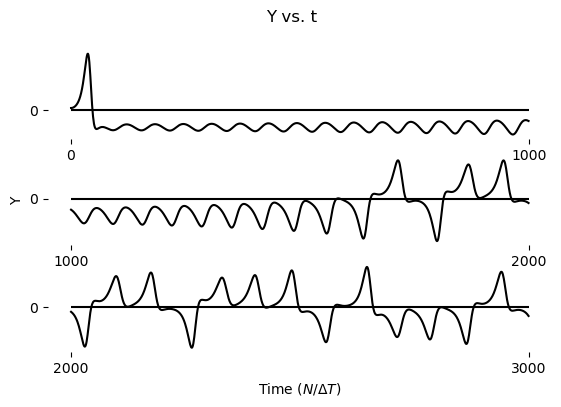

In [5]:
# Plotting

plt.figure(1, figsize = (6.5, 4), dpi = 100)
plt.suptitle('Y vs. t')

plt.subplot(3, 1, 1, frameon = False)
plt.plot((t_eval/dt)[:1000], sol_y[:1000], 'k')
plt.xticks([0, 1000])
plt.yticks([0])
plt.hlines(y=0, xmin = 0, xmax = 1000, color = 'k')

plt.subplot(3, 1, 2, frameon = False)
plt.plot((t_eval/dt)[1000:2000], sol_y[1000:2000], 'k')
plt.xticks([1000, 2000])
plt.yticks([0])
plt.hlines(y=0, xmin = 1000, xmax = 2000, color = 'k')
plt.ylabel('Y')

plt.subplot(3, 1, 3, frameon = False)
plt.plot((t_eval/dt)[2000:3000], sol_y[2000:3000], 'k')
plt.xticks([2000, 3000])
plt.yticks([0])
plt.hlines(y=0, xmin = 2000, xmax = 3000, color = 'k')
plt.xlabel('Time ($N/\Delta T$)')

#plt.savefig('plots/a3q2_y_vs_t.pdf', dpi = 300)

### Task 4 - Recreating Lorenz' Figure 2

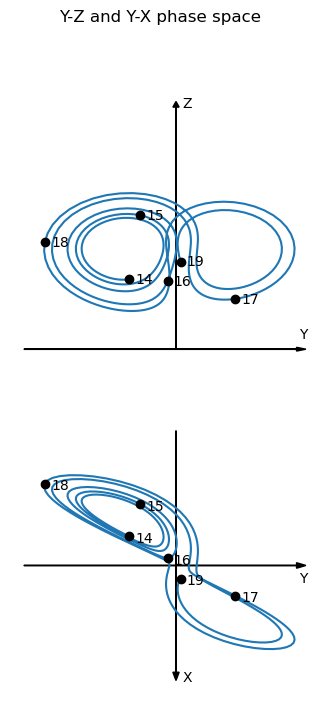

In [6]:
# Just more plotting

plt.figure(2, figsize = (4, 8), dpi=100)
plt.tight_layout()
plt.suptitle('Y-Z and Y-X phase space')

plt.subplot(2, 1, 1, frameon = False)
plt.plot(sol_y[1400:1900], sol_z[1400:1900])
for i in range(1400, 2000, 100):
    plt.plot(sol_y[i], sol_z[i], 'ko')
    plt.text(sol_y[i] + 1, sol_z[i] - 1, '{:.0f}'.format(i/100))
plt.text(sol_y.max()-8, 3, 'Y')
plt.text(1, sol_z.max()+16, 'Z')
plt.xticks([])
plt.yticks([])
plt.arrow(sol_y.min(), 0, sol_y.max()+16, 0, width = 0.1, head_width = 1, ec = 'k', fc = 'k')
plt.arrow(0, sol_z.min(), 0, sol_z.max()+16, width = 0.1, head_width = 1, ec = 'k', fc = 'k')

plt.subplot(2, 1, 2, frameon = False)
plt.plot(sol_y[1400:1900], sol_x[1400:1900])
plt.gca().invert_yaxis()
for i in range(1400, 2000, 100):
    plt.plot(sol_y[i], sol_x[i], 'ko')
    plt.text(sol_y[i] + 1, sol_x[i] + 1, '{:.0f}'.format(i/100))
plt.text(sol_y.max()-8, 3, 'Y')
plt.text(1, sol_x.max()+1, 'X')
plt.xticks([])
plt.yticks([])
plt.arrow(sol_y.min(), 0, sol_y.max()+16, 0, width = 0.1, head_width = 1, ec = 'k', fc = 'k')
plt.arrow(0, sol_y.min(), 0, sol_y.max()+16, width = 0.1, head_width = 1, ec = 'k', fc = 'k')

#plt.savefig('plots/a3q2_phase.pdf', dpi = 300)

### Task 5 - Perturbation of initial conditions

In [7]:
y0_p = [sum(x) for x in zip(y0, [0., 1.e-8, 0.])]
sol_x2, sol_y2, sol_z2 = solve_lorenz(y0_p).y
distance = np.sqrt((sol_x - sol_x2)**2 + (sol_y - sol_y2)**2 + (sol_z - sol_z2)**2)

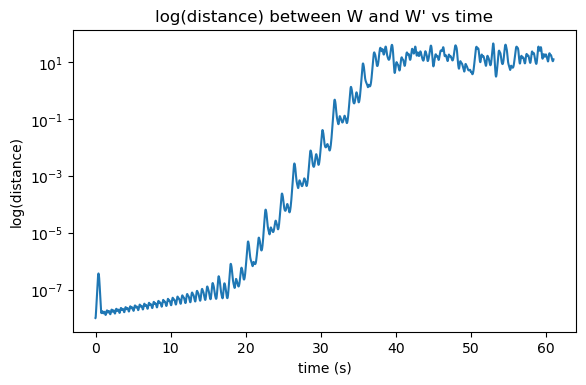

In [8]:
plt.figure(figsize = (6.5, 4), dpi = 100)
plt.title("log(distance) between W and W' vs time")
plt.semilogy(t_eval, distance)
plt.ylabel('log(distance)')
plt.xlabel('time (s)')

plt.savefig('plots/a3q2_dist_vs_t.pdf', dpi = 300)